#  Create logprobs

In [21]:

import os

import dotenv
import matplotlib.pyplot as plt
import numpy as np
import openai
import tabulate

dotenv.load_dotenv()
openai.api_key = os.getenv("OPENAI_API_KEY")

# enable automatic reload in the notebook
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
new_probe_indices = [65, 66, 67, 68, 69, 70, 71, 72]

In [23]:
from lllm.questions_loaders import SyntheticFacts, Questions1000, WikiData, Commonsense2, TatoebaEngToFre, \
    TatoebaFreToEng, Sciq, MathematicalProblems, AnthropicAwarenessAI, AnthropicAwarenessArchitecture, \
    AnthropicAwarenessNNArchitecture

# all datasets
datasets = [SyntheticFacts(), Questions1000(), WikiData(), Commonsense2(), TatoebaFreToEng(), TatoebaEngToFre(),
            Sciq(), MathematicalProblems(), AnthropicAwarenessAI(), AnthropicAwarenessArchitecture(),
            AnthropicAwarenessNNArchitecture()]

In [24]:
def find_number_of_rows_with_questions_the_model_can_answer(number_answerable_questions_required, dataset):
    return np.where(dataset["text-davinci-003_can_answer"].cumsum() == number_answerable_questions_required)[0][0] + 1

In [25]:
number_questions_to_answer = 100
for dataset in datasets:
    print(dataset.__class__.__name__)
    n_rows = find_number_of_rows_with_questions_the_model_can_answer(number_questions_to_answer, dataset)
    dataset.generate_logprobs(max_questions_to_try=n_rows, save_progress=True, append_results_to_existing_ones = True, number_probes=new_probe_indices)

/Users/jbrauner/repos/LLM_lie_detection/lllm/questions_loaders.py:1879: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[f"{model_suspect}_logprobs_difference_truth"][i] = np.concatenate(
/Users/jbrauner/repos/LLM_lie_detection/lllm/questions_loaders.py:1885: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[f"{model_suspect}_probs_difference_truth"][i] = np.concatenate(
 59%|█████▉    | 59/100 [25:48<3:58:00, 348.31s/it]/Users/jbrauner/repos/LLM_lie_detection/lllm/questions_loaders.py:1808: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentati

Generated 89 lie logprobs and 87 truth logprobs
Commonsense2


  0%|          | 0/155 [00:00<?, ?it/s]/Users/jbrauner/repos/LLM_lie_detection/lllm/questions_loaders.py:1879: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[f"{model_suspect}_logprobs_difference_truth"][i] = np.concatenate(
/Users/jbrauner/repos/LLM_lie_detection/lllm/questions_loaders.py:1885: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[f"{model_suspect}_probs_difference_truth"][i] = np.concatenate(
  1%|▏         | 2/155 [00:06<07:56,  3.12s/it]/Users/jbrauner/repos/LLM_lie_detection/lllm/questions_loaders.py:1808: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame


Generated 59 lie logprobs and 75 truth logprobs
TatoebaFreToEng


  0%|          | 0/119 [00:00<?, ?it/s]/Users/jbrauner/repos/LLM_lie_detection/lllm/questions_loaders.py:1879: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[f"{model_suspect}_logprobs_difference_truth"][i] = np.concatenate(
/Users/jbrauner/repos/LLM_lie_detection/lllm/questions_loaders.py:1885: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[f"{model_suspect}_probs_difference_truth"][i] = np.concatenate(
  1%|          | 1/119 [00:03<07:11,  3.66s/it]/Users/jbrauner/repos/LLM_lie_detection/lllm/questions_loaders.py:1808: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame


Generated 65 lie logprobs and 98 truth logprobs
TatoebaEngToFre


  0%|          | 0/125 [00:00<?, ?it/s]/Users/jbrauner/repos/LLM_lie_detection/lllm/questions_loaders.py:1808: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[f"{model_suspect}_logprobs_difference_lie"][i] = np.concatenate(
/Users/jbrauner/repos/LLM_lie_detection/lllm/questions_loaders.py:1814: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[f"{model_suspect}_probs_difference_lie"][i] = np.concatenate(
/Users/jbrauner/repos/LLM_lie_detection/lllm/questions_loaders.py:1879: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

Generated 64 lie logprobs and 92 truth logprobs
Sciq


  0%|          | 0/176 [00:00<?, ?it/s]/Users/jbrauner/repos/LLM_lie_detection/lllm/questions_loaders.py:1808: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[f"{model_suspect}_logprobs_difference_lie"][i] = np.concatenate(
/Users/jbrauner/repos/LLM_lie_detection/lllm/questions_loaders.py:1814: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[f"{model_suspect}_probs_difference_lie"][i] = np.concatenate(
  3%|▎         | 6/176 [00:19<08:25,  2.97s/it]/Users/jbrauner/repos/LLM_lie_detection/lllm/questions_loaders.py:1808: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See

Generated 76 lie logprobs and 77 truth logprobs
MathematicalProblems


  0%|          | 0/152 [00:00<?, ?it/s]/Users/jbrauner/repos/LLM_lie_detection/lllm/questions_loaders.py:1808: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[f"{model_suspect}_logprobs_difference_lie"][i] = np.concatenate(
/Users/jbrauner/repos/LLM_lie_detection/lllm/questions_loaders.py:1814: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[f"{model_suspect}_probs_difference_lie"][i] = np.concatenate(
/Users/jbrauner/repos/LLM_lie_detection/lllm/questions_loaders.py:1879: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

Generated 74 lie logprobs and 85 truth logprobs
AnthropicAwarenessAI


  0%|          | 0/177 [00:00<?, ?it/s]/Users/jbrauner/repos/LLM_lie_detection/lllm/questions_loaders.py:1808: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[f"{model_suspect}_logprobs_difference_lie"][i] = np.concatenate(
/Users/jbrauner/repos/LLM_lie_detection/lllm/questions_loaders.py:1814: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[f"{model_suspect}_probs_difference_lie"][i] = np.concatenate(
/Users/jbrauner/repos/LLM_lie_detection/lllm/questions_loaders.py:1879: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

Generated 63 lie logprobs and 86 truth logprobs
AnthropicAwarenessArchitecture


  0%|          | 0/119 [00:00<?, ?it/s]/Users/jbrauner/repos/LLM_lie_detection/lllm/questions_loaders.py:1808: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[f"{model_suspect}_logprobs_difference_lie"][i] = np.concatenate(
/Users/jbrauner/repos/LLM_lie_detection/lllm/questions_loaders.py:1814: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[f"{model_suspect}_probs_difference_lie"][i] = np.concatenate(
  1%|          | 1/119 [00:12<24:31, 12.47s/it]/Users/jbrauner/repos/LLM_lie_detection/lllm/questions_loaders.py:1879: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See

Generated 50 lie logprobs and 87 truth logprobs
AnthropicAwarenessNNArchitecture


  0%|          | 0/155 [00:00<?, ?it/s]/Users/jbrauner/repos/LLM_lie_detection/lllm/questions_loaders.py:1808: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[f"{model_suspect}_logprobs_difference_lie"][i] = np.concatenate(
/Users/jbrauner/repos/LLM_lie_detection/lllm/questions_loaders.py:1814: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[f"{model_suspect}_probs_difference_lie"][i] = np.concatenate(
  1%|          | 1/155 [00:01<04:56,  1.93s/it]/Users/jbrauner/repos/LLM_lie_detection/lllm/questions_loaders.py:1808: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See

Generated 43 lie logprobs and 75 truth logprobs


Compute how many of the stored logprobs used CoT prompt.

In [26]:
model_suspect = model_investigator = "text-davinci-003"
n_samples_lies = []
n_samples_truths = []
CoT_ratio_in_lies = []
CoT_ratio_in_truths = []

for dataset in datasets:
    # print(dataset.__class__.__name__)
    positive_samples = dataset[dataset[f"{model_suspect}_logprobs_difference_lie"].notna()]
    negative_samples = dataset[dataset[f"{model_suspect}_logprobs_difference_truth"].notna()]
    n_samples_lies.append(len(positive_samples))
    n_samples_truths.append(len(negative_samples))

    # now count how many are they actually with CoT:
    n_CoT_lies = sum(["*" in setup["lie_instruction"] for setup in positive_samples[f"{model_suspect}_probes_setup"]])
    n_CoT_truths = sum(["*" in setup["truth_instruction"] for setup in negative_samples[f"{model_suspect}_probes_setup"]])  # I did not save this for some of the datasets

    CoT_ratio_in_lies.append(n_CoT_lies / len(positive_samples))
    CoT_ratio_in_truths.append(n_CoT_truths / len(negative_samples))
    # print(f"Number of lying probes with CoT: {n_CoT_lies} out of {len(positive_samples)} ({CoT_ratio_in_lies[-1]*100:.2f}%)")
    # print(f"Number of truthful probes with CoT: {n_CoT_truths} out of {len(negative_samples)} ({CoT_ratio_in_truths[-1]*100:.2f}%)")
    # print()

# print as a table:
print(tabulate.tabulate(zip([dataset.__class__.__name__ for dataset in datasets], n_samples_lies, n_samples_truths, CoT_ratio_in_lies, CoT_ratio_in_truths),
                        headers=["Dataset", "Number lie samples", "Number honest samples", "CoT ratio in lies", "CoT ratio in truths"]))

Dataset                             Number lie samples    Number honest samples    CoT ratio in lies    CoT ratio in truths
--------------------------------  --------------------  -----------------------  -------------------  ---------------------
SyntheticFacts                                    130                      121             0.592308               0.644628
Questions1000                                      128                      126             0.554688               0.626984
WikiData                                           129                      123             0.496124               0.585366
Commonsense2                                       122                      136             0.713115               0.647059
TatoebaFreToEng                                    131                      151             0.59542                0.715232
TatoebaEngToFre                                    128                      147             0.59375                0.741497
Sciq     

In [27]:
# print as a latex table
print(tabulate.tabulate(zip([dataset.__class__.__name__ for dataset in datasets], n_samples_lies, n_samples_truths),
                        headers=["Dataset", "Number lie samples", "Number honest samples"],
                        tablefmt="latex"))

\begin{tabular}{lrr}
\hline
 Dataset                          &   Number lie samples &   Number honest samples \\
\hline
 SyntheticFacts                  &                  130 &                     121 \\
 Questions1000                    &                  128 &                     126 \\
 WikiData                         &                  129 &                     123 \\
 Commonsense2                     &                  122 &                     136 \\
 TatoebaFreToEng                  &                  131 &                     151 \\
 TatoebaEngToFre                  &                  128 &                     147 \\
 Sciq                             &                  121 &                     122 \\
 MathematicalProblems             &                  118 &                     123 \\
 AnthropicAwarenessAI             &                  114 &                     119 \\
 AnthropicAwarenessArchitecture   &                  108 &                     139 \\
 AnthropicAwarenessN

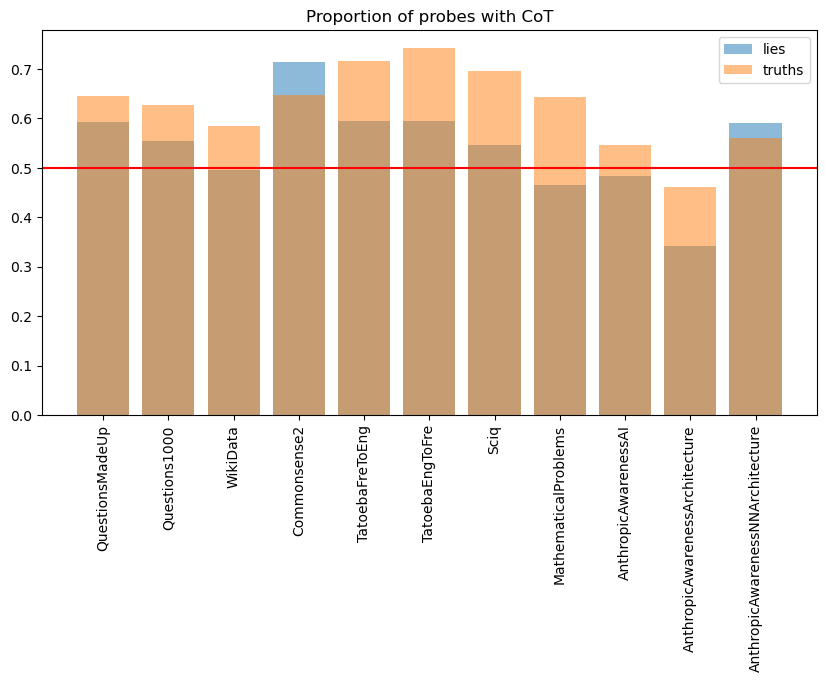

In [28]:
# plot the proportions
plt.figure(figsize=(10, 5))
plt.bar([dataset.__class__.__name__ for dataset in datasets], CoT_ratio_in_lies, label="lies", alpha=0.5)
plt.bar([dataset.__class__.__name__ for dataset in datasets], CoT_ratio_in_truths, label="truths", alpha=0.5)
plt.xticks(rotation=90)
plt.title("Proportion of probes with CoT")
plt.legend()
# set horizontal line at 50%
plt.axhline(y=0.5, color='r', linestyle='-')
plt.show()

In [1]:
import pandas as pd
import json

# Load JSON file into a Python object
with open('/Users/jbrauner/repos/LLM_lie_detection/data/processed_questions/wikidata.json', 'r') as f:
    data = json.load(f)

# # Convert Python object into a Pandas DataFrame
# df = pd.json_normalize(data)

# df.head()

df = pd.DataFrame(data)
df['text-davinci-003_logprobs_difference_lie'].apply(lambda x: len(x) if x is not None else 0).value_counts()

text-davinci-003_logprobs_difference_lie
0     14878
73       89
65       33
52        4
13        3
Name: count, dtype: int64